In [34]:
from mmdet.apis import init_detector, inference_detector
from mmdet.registry import VISUALIZERS
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# download model

In [ ]:
!mim download mmdet --config rtmdet_tiny_8xb32-300e_coco --dest ./checkpoints

In [37]:
config_file = 'configs/rtmdet/rtmdet_tiny_8xb32-300e_coco.py'
checkpoint_file = 'checkpoints/rtmdet_tiny_8xb32-300e_coco_20220902_112414-78e30dcc.pth'
image_file = 'demo/demo.jpg'

(640, 427)


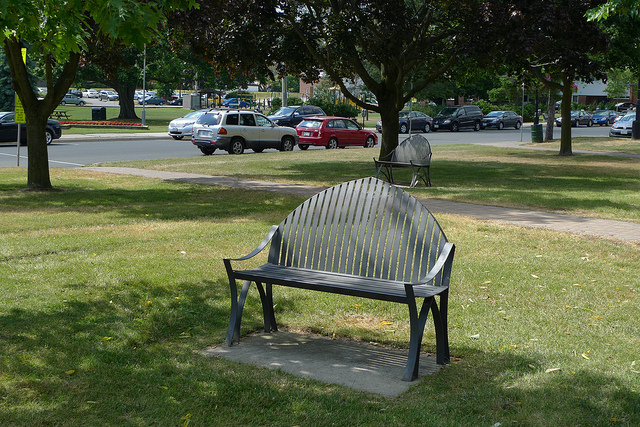

In [38]:
image = Image.open(image_file)
print(image.size) # w h
image

# model&infer

In [39]:
model = init_detector(config_file, checkpoint_file, device='cuda:0')
model

Loads checkpoint by local backend from path: checkpoints/rtmdet_tiny_8xb32-300e_coco_20220902_112414-78e30dcc.pth
The model and loaded state dict do not match exactly

unexpected key in source state_dict: data_preprocessor.mean, data_preprocessor.std



RTMDet(
  (data_preprocessor): DetDataPreprocessor()
  (backbone): CSPNeXt(
    (stem): Sequential(
      (0): ConvModule(
        (conv): Conv2d(3, 12, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): _BatchNormXd(12, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (activate): SiLU(inplace=True)
      )
      (1): ConvModule(
        (conv): Conv2d(12, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn): _BatchNormXd(12, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (activate): SiLU(inplace=True)
      )
      (2): ConvModule(
        (conv): Conv2d(12, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn): _BatchNormXd(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (activate): SiLU(inplace=True)
      )
    )
    (stage1): Sequential(
      (0): ConvModule(
        (conv): Conv2d(24, 48, kernel_size=(3, 3), stride=(2, 2), pad

In [40]:
result = inference_detector(model, image_file)
result

<DetDataSample(

    META INFORMATION
    ori_shape: (427, 640)
    img_path: 'demo/demo.jpg'
    pad_shape: (640, 640)
    batch_input_shape: (640, 640)
    img_shape: (640, 640)
    scale_factor: (1.0, 1.0)
    img_id: 0

    DATA FIELDS
    ignored_instances: <InstanceData(
        
            META INFORMATION
        
            DATA FIELDS
            bboxes: tensor([], device='cuda:0', size=(0, 4))
            labels: tensor([], device='cuda:0', dtype=torch.int64)
        ) at 0x1ed47ffedd0>
    pred_instances: <InstanceData(
        
            META INFORMATION
        
            DATA FIELDS
            bboxes: tensor([[221.3719, 176.1281, 456.2581, 383.2401],
                        [295.3506, 117.1835, 378.5715, 150.2712],
                        [190.5735, 109.7099, 299.5221, 155.0396],
                        ...,
                        [373.1318, 133.4568, 432.5015, 188.4432],
                        [ 62.4457,  80.0291, 119.8074, 104.2917],
                        [1

In [41]:
scores = result.pred_instances.scores.cpu().numpy()
print(scores.shape)
print(scores)

(300,)
[0.8703239  0.76773655 0.74278235 0.69945955 0.6846587  0.62378454
 0.609655   0.6063341  0.5566043  0.5535145  0.5014958  0.47791043
 0.47463083 0.47184524 0.46392938 0.44906044 0.4410464  0.4129124
 0.39391962 0.36498353 0.35242847 0.34419405 0.32074687 0.319054
 0.31453452 0.31440276 0.31188568 0.2992144  0.2889555  0.27620593
 0.2759691  0.2734595  0.26939714 0.26581046 0.25715983 0.25331387
 0.24796142 0.23466541 0.23082455 0.22585617 0.22551869 0.22522539
 0.22401701 0.2235416  0.21956663 0.21360047 0.20986101 0.2050785
 0.1983299  0.19724357 0.19718574 0.19087124 0.19025332 0.18728513
 0.1871606  0.18280526 0.18156    0.179431   0.17888997 0.17611739
 0.17602693 0.17434601 0.17425798 0.17219512 0.17171241 0.17100024
 0.17076454 0.16899505 0.16880783 0.16508658 0.16491279 0.16278625
 0.1622161  0.16187273 0.16105562 0.15746632 0.15687561 0.15197751
 0.14897995 0.14785033 0.14739434 0.14732656 0.14623784 0.14428562
 0.14351536 0.14255169 0.14199054 0.14139968 0.13977003 0.1

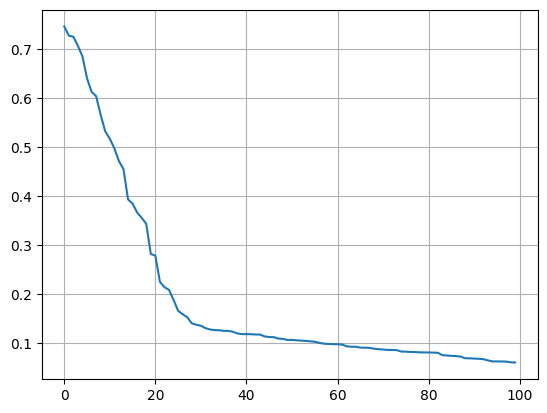

In [28]:
plt.plot(scores)
plt.grid(True)

In [42]:
labels = result.pred_instances.labels.cpu().numpy()
print(labels.shape)
print(labels)

(300,)
[13  2  2  2  2  2  2  2  2  2  2  2  2 56 13  2  2  2  2  2  2  2  2  2
  2  7  2  2  2  2  2  2  2  2  2  2  2  2  2  7  2  7  2  7  2  2  2  2
  0  2  7  2  2  7  2  2 56  2 56  2  2  2  2  2  7  2  2  2  2  2  2  2
 60 13  7  2  7  2 16  2  7  2  2  2 13  2  2  2  2  2  7  2  7  7  2  7
  2  2  7  7  2  2 60 13  2  2 13  2  2  2  7  2  7  2  2  2  7  2  2  7
  2  2  2  2  2  2  7  2  7  2  7 13  7  7  2  7 13  0  2 17  2  2  2  2
  2  7 28 56  7  7  2  1  2  7 13  2  2  7  2 13  2  2  7  2  0  2  7  7
 58  7 57  9 13  2  2  2  7 56  2  2  3 13 56  7  7 13  2  2  0 16  2  7
  7  0  7  0  7  7  2  7  7  7  7  2  2  2  2 13  7  5  0  0  7  0  7  2
  7  1  1  2  2  7  1  2  7  2 14 13  5  3 13  7  7 56  7  7  3  7 13  0
  2  2  2  2  1 13  2 13  2 13  2  7  3  2  3  2  0  2 13 60  7  7  7 56
  3  0  2 13  5  0  0  7  7  2 60 59  7  0  7  7  2  2  2  2  1  7  1  2
  0  7  5  0  0  7  0  7 56  3  7  1]


In [43]:
bboxes = result.pred_instances.bboxes.cpu().numpy()
print(bboxes.shape)
print(bboxes)

(300, 4)
[[221.37192  176.12808  456.25812  383.2401  ]
 [295.35056  117.1835   378.57153  150.27118 ]
 [190.5735   109.709854 299.52213  155.03963 ]
 ...
 [373.1318   133.45685  432.50153  188.44319 ]
 [ 62.445675  80.02911  119.80738  104.29168 ]
 [141.49605   94.17529  184.4167   107.80607 ]]


# VISUALIZERS

In [47]:
model.cfg

Config (path: configs/rtmdet/rtmdet_tiny_8xb32-300e_coco.py): {'default_scope': 'mmdet', 'default_hooks': {'timer': {'type': 'IterTimerHook'}, 'logger': {'type': 'LoggerHook', 'interval': 50}, 'param_scheduler': {'type': 'ParamSchedulerHook'}, 'checkpoint': {'type': 'CheckpointHook', 'interval': 10, 'max_keep_ckpts': 3, 'save_best': 'auto'}, 'sampler_seed': {'type': 'DistSamplerSeedHook'}, 'visualization': {'type': 'DetVisualizationHook'}}, 'env_cfg': {'cudnn_benchmark': False, 'mp_cfg': {'mp_start_method': 'fork', 'opencv_num_threads': 0}, 'dist_cfg': {'backend': 'nccl'}}, 'vis_backends': [{'type': 'LocalVisBackend'}, {'type': 'TensorboardVisBackend'}], 'visualizer': {'type': 'DetLocalVisualizer', 'vis_backends': [{'type': 'LocalVisBackend'}, {'type': 'TensorboardVisBackend'}], 'name': 'visualizer'}, 'log_processor': {'type': 'LogProcessor', 'window_size': 50, 'by_epoch': True}, 'log_level': 'INFO', 'load_from': None, 'resume': False, 'train_cfg': {'type': 'EpochBasedTrainLoop', 'max_

In [49]:
model.cfg.visualizer

{'type': 'DetLocalVisualizer',
 'vis_backends': [{'type': 'LocalVisBackend'},
  {'type': 'TensorboardVisBackend'}],
 'name': 'visualizer'}

In [50]:
model.dataset_meta

{'classes': ('person',
  'bicycle',
  'car',
  'motorcycle',
  'airplane',
  'bus',
  'train',
  'truck',
  'boat',
  'traffic light',
  'fire hydrant',
  'stop sign',
  'parking meter',
  'bench',
  'bird',
  'cat',
  'dog',
  'horse',
  'sheep',
  'cow',
  'elephant',
  'bear',
  'zebra',
  'giraffe',
  'backpack',
  'umbrella',
  'handbag',
  'tie',
  'suitcase',
  'frisbee',
  'skis',
  'snowboard',
  'sports ball',
  'kite',
  'baseball bat',
  'baseball glove',
  'skateboard',
  'surfboard',
  'tennis racket',
  'bottle',
  'wine glass',
  'cup',
  'fork',
  'knife',
  'spoon',
  'bowl',
  'banana',
  'apple',
  'sandwich',
  'orange',
  'broccoli',
  'carrot',
  'hot dog',
  'pizza',
  'donut',
  'cake',
  'chair',
  'couch',
  'potted plant',
  'bed',
  'dining table',
  'toilet',
  'tv',
  'laptop',
  'mouse',
  'remote',
  'keyboard',
  'cell phone',
  'microwave',
  'oven',
  'toaster',
  'sink',
  'refrigerator',
  'book',
  'clock',
  'vase',
  'scissors',
  'teddy bear',


In [48]:
# init the visualizer(execute this block only once)
visualizer = VISUALIZERS.build(model.cfg.visualizer)
# the dataset_meta is loaded from the checkpoint and
# then pass to the model in init_detector
visualizer.dataset_meta = model.dataset_meta
visualizer

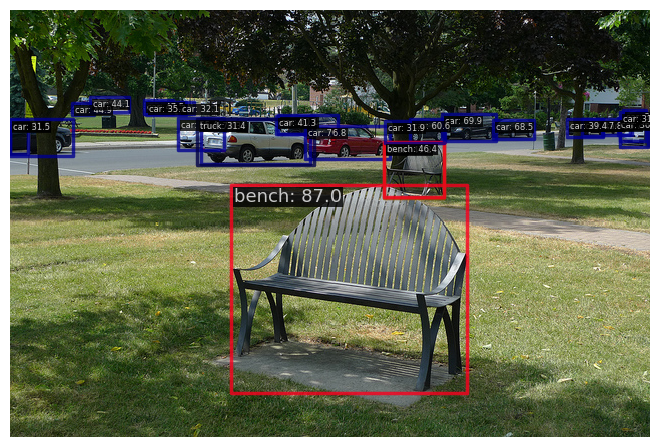

In [46]:
# show the results
visualizer.add_datasample(
    'result',
    np.array(image),
    data_sample=result,
    draw_gt=False,
    wait_time=0,
)
visualizer.show()